1. Downloading the MNIST dataset

In [54]:
import torch
from torchvision import datasets, transforms

# Define the transform to convert images to tensors
transform = transforms.Compose([transforms.ToTensor()])

# Download the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Save the dataset in DataLoader format for easy access
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


2. Prepare the Data
  
  2.1 Introduce the MNIST Dataset
        • Write a brief explanation about the MNIST dataset in your Jupyter Notebook.
          o Include details such as:
            § The size of the dataset.
            § Number of classes (digits 0-9).
            § Your Image dimensions.

  2.2 Create a Dataset and DataLoader
        • Create a PyTorch Dataset to handle the raw MNIST data.
        • Use a PyTorch DataLoader to manage batching for your data.
  2.3 Preprocess the Data
        • Apply necessary transforms (e.g., normalization, resizing) to preprocess the data.
        o Use PyTorch’s torchvision.transforms or other preprocessing methods.
        o Clearly explain why the preprocessing steps were necessary.
  2.4 Visualize the Processed Data
        • Visualize a sample of the processed data (e.g., show a grid of images).
        • Use appropriate titles for the visualizations to include your name.

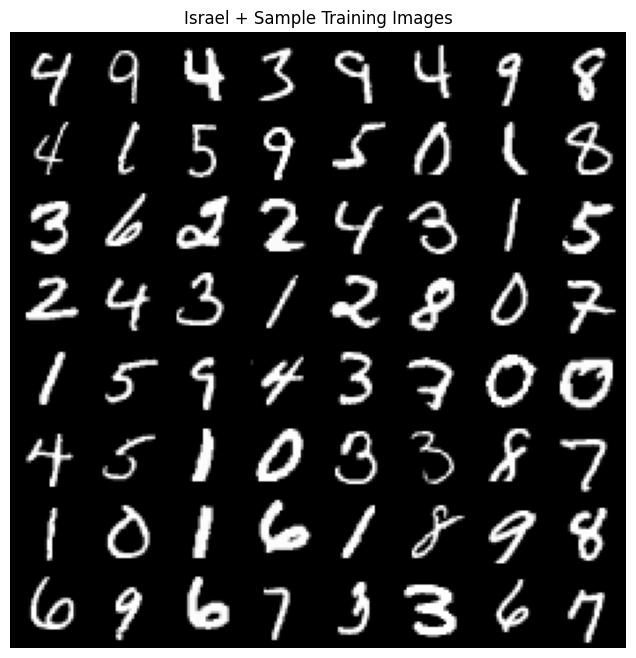

In [55]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

# Eefine transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# show samples from batch images
sample_batch = next(iter(train_loader))
plt.figure(figsize=(10, 8)); plt.axis("off"); plt.title("Israel + Sample Training Images")
plt.imshow(np.transpose(make_grid(sample_batch[0], padding=1, normalize=True),(1,2,0)));

3. Build a CNN Model
  
  3.1 Define the Model Structure
        • Design your own CNN model with layers like convolutional layers, pooling layers,
        and fully connected layers.
        • The model must be implemented using PyTorch.

In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # After pooling, image size is 7x7
        self.fc2 = nn.Linear(128, 10)  # 10 output classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 -> ReLU -> Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool
        x = x.view(-1, 64 * 7 * 7)  # Flatten before FC layers
        x = F.relu(self.fc1(x))  # Fully connected layer with ReLU
        x = self.fc2(x)  # Output layer (logits)
        return x

# Initialize the model
model = CNN()


  3.
    3.2 Set Up the Trainer
          • Define a training loop that includes:
          o A loss function (e.g., Cross-Entropy Loss).
          o An optimizer (e.g., Adam or SGD).
          o A learning rate scheduler (if applicable).

In [57]:
import torch.optim as optim

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


3. 3.3 Summarize Model
        • Use torchsummary or other tools to display a summary of your CNN, showing:
          o Layer names.
          o Output dimensions for each layer.
          o Total number of parameters. 3.4 Train Your Model
          • Train your model for multiple epochs (e.g., 50–100).
          • Ensure that your model learns effectively by monitoring loss and accuracy during training

In [58]:
from torchsummary import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Linear-5                  [-1, 128]         401,536
            Linear-6                   [-1, 10]           1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.36
Params size (MB): 1.61
Estimated Total Size (MB): 1.97
----------------------------------------------------------------


3. 3.4 Train the model for multiple epochs
        (e.g., 50–100).
        • Ensure that your model learns effectively by monitoring loss and accuracy during training

In [59]:
def train_model(model, train_loader, optimizer, criterion, epochs=5):
    model.train()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        scheduler.step()
        accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/5, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")

# Train the model for 5 epochs
train_model(model, train_loader, optimizer, criterion, epochs=5)


Epoch 1/5, Loss: 0.1733, Accuracy: 94.76%
Epoch 2/5, Loss: 0.0514, Accuracy: 98.42%
Epoch 3/5, Loss: 0.0355, Accuracy: 98.84%
Epoch 4/5, Loss: 0.0255, Accuracy: 99.17%
Epoch 5/5, Loss: 0.0202, Accuracy: 99.35%


4. Visualize and Evaluation
        • Create at least 5 visualizations to evaluate/ Visualize the performance of your
        model, such as (you can make your own choice):
        o Training loss over epochs.
        o Validation loss over epochs.
        o Visualize predicted results and actual results.
        o Validation accuracy over epochs.
        o Confusion matrix or misclassified examples.
        • Requirement: Add your name to the title of each visualization.
        • Use text cells to explain your visualizations and analyze the quality of your model.
        For example:
        o How well does your model perform on the test set?
        o Are there patterns in the loss/accuracy curves (e.g., overfitting or
        underfitting)?
        o Which digits are most often misclassified?

Visualization 1: Training Loss Over Epochs

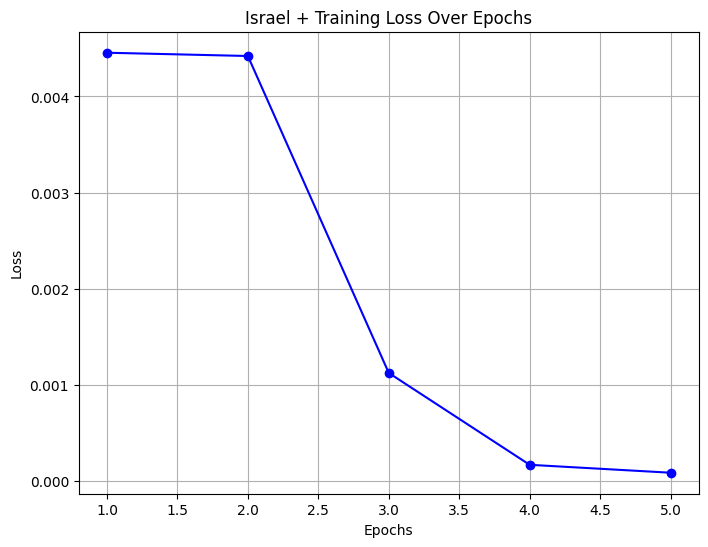

In [60]:
plt.figure(figsize=(8,6))
plt.plot(range(1, 6), train_losses, marker='o', linestyle='-', color='b')
plt.title("Israel + Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

Visualization 2: Training Accuracy Over Epochs

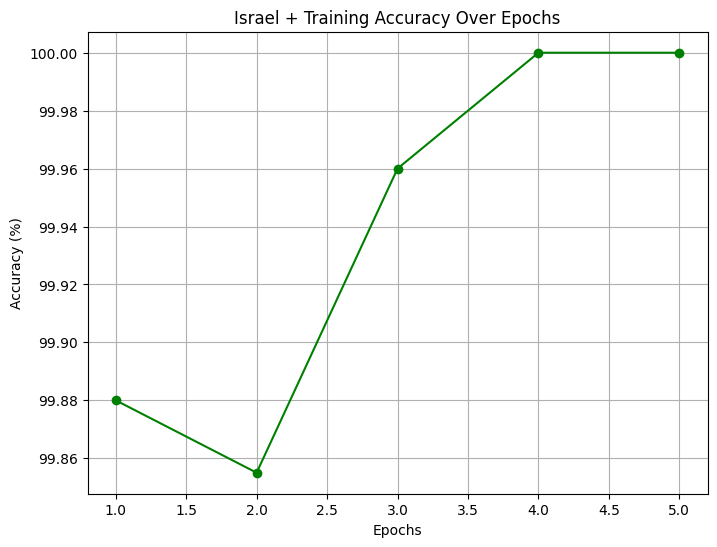

In [61]:
plt.figure(figsize=(8,6))
plt.plot(range(1, 6), train_accuracies, marker='o', linestyle='-', color='g')
plt.title("Israel + Training Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()

Visualization 3: Predicted vs. Actual Labels

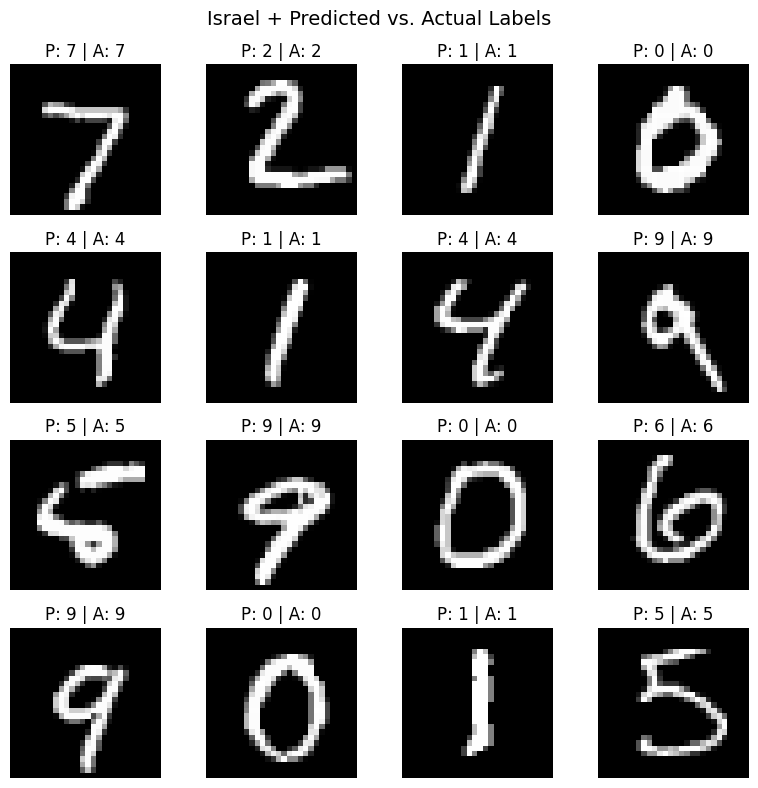

In [62]:
import numpy as np

# Get a batch of test data
test_iter = iter(test_loader)
images, labels = next(test_iter)
images, labels = images[:16], labels[:16]  # Take first 16 images

# Move data to the same device as the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
images = images.to(device)
labels = labels.to(device)

# Get predictions
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Convert to CPU for visualization
images, labels, predicted = images.cpu(), labels.cpu(), predicted.cpu()

# Plot images with actual and predicted labels
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle("Israel + Predicted vs. Actual Labels", fontsize=14)
for i, ax in enumerate(axes.flat):
    img = images[i][0].numpy()
    ax.imshow(img, cmap='gray')
    ax.set_title(f"P: {predicted[i]} | A: {labels[i]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

Visualization 4: Confusion Matrix

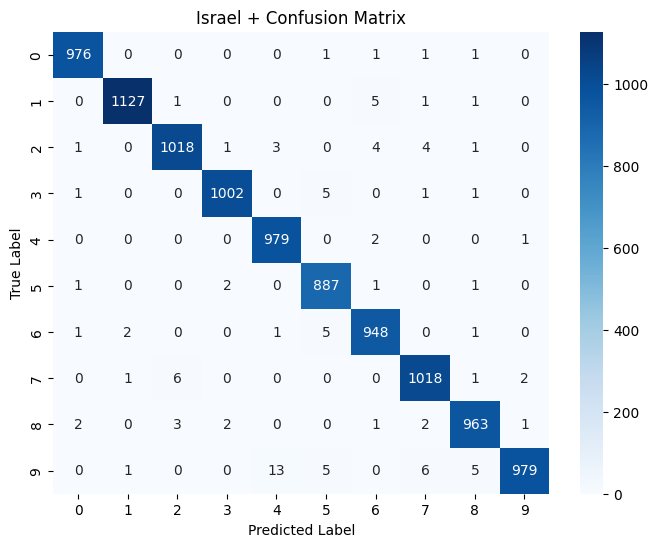

In [63]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get all predictions and true labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Israel + Confusion Matrix")
plt.show()

Visualization 5: Misclassified Examples

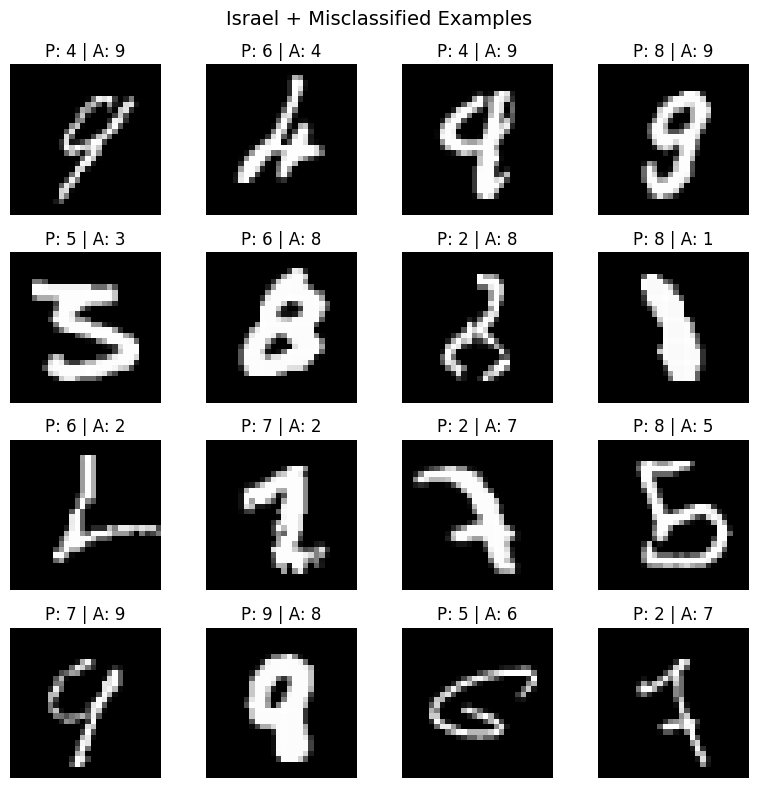

In [64]:
misclassified_images = []
misclassified_labels = []
misclassified_preds = []

# Collect misclassified samples
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    misclassified_mask = (predicted != labels)
    if misclassified_mask.sum() > 0:
        misclassified_images.extend(images[misclassified_mask].cpu())
        misclassified_labels.extend(labels[misclassified_mask].cpu())
        misclassified_preds.extend(predicted[misclassified_mask].cpu())

# Display 16 misclassified images
misclassified_images = misclassified_images[:16]
misclassified_labels = misclassified_labels[:16]
misclassified_preds = misclassified_preds[:16]

fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle("Israel + Misclassified Examples", fontsize=14)
for i, ax in enumerate(axes.flat):
    img = misclassified_images[i][0].numpy()
    ax.imshow(img, cmap='gray')
    ax.set_title(f"P: {misclassified_preds[i]} | A: {misclassified_labels[i]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

Saving the model

In [65]:
# Define the filename
model_path = "mnist_trained_model.pth"

# Save the model's state dictionary (weights)
torch.save(model.state_dict(), model_path)